### FE - 680 Assignment 1

Completed By: Riley Heiman

Instructor: Dragos Bozdog (PhD)



In [2]:
import os 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

In [3]:
os.chdir(r'D:\Documents\Stevens\FE-680\HW1')
os.getcwd() 

'd:\\Documents\\Stevens\\FE-680\\HW1'

---

## Problem 1

- Fill in forward curve, discount curve, zero curve

### Forward Rate 
$r_0(t_1, t_2) =$ Forward rate  between time $t_1$ and $t_2$

$[ 1 + r_0(0,1)][ 1 + r_0(1,2)] =  [1 + r_0(0,2)^2] $

$[ 1 + r_0(1,2)] = \frac{[1 + r_0(0,2)^2]}{[ 1 + r_0(0,1)]} $

$r_0(1,2) = \frac{[1 + r_0(0,2)^2]}{[ 1 + r_0(0,1)]} - 1 $

$f(t) = \frac{d(t-1)}{d(t)} -1 $
### Discount Rate

$ d_1 = \frac{1}{ (1+f_1)} $

$ d_2 = \frac{1}{ (1+f_1) (1+f_2) } $

$ d_n = \frac{1}{ (1+f_1) (1+f_2) ... (1+f_n) } $


### Zero Rate
$ z(t) = (\frac{1}{d(t)})^\frac{1}{t} - 1$

### Par Coupon Rate

$c = \frac{1- d(t)}{\Sigma d(i)}$

In [15]:
#def forward(r1, r2):
#    r = (1+(r2**2) / 1+r1) -1
#    r = round(r, ndigits = 3)*100
#    return( r )  
def forward(dt_1, dt):
    (dt_1 / dt)-1

def discount_rate(list_of_rates):
    new_d = [((i/100)+1) for i in list_of_rates]
    denominator = np.prod(new_d)
    return( round( 1/denominator , ndigits = 4) ) 

In [5]:
dn = [5, 5.2]
discount_rate(dn) 

0.9053

In [21]:
df = pd.DataFrame({'TYPE': ['OVERNIGHT', 'CASH', 'CASH', 'FORWARDS', 'FORWARDS', 'FORWARDS', 'SWAPS', 'SWAPS','SWAPS','SWAPS','SWAPS',],
                   'YEARS': np.arange(0,11,1),
                   'INPUTS': [1.9, 2.2, 2.4, 2.5, 2.75, 2.8, 2.85, 3.1, 3.150, 3.3, 3.45] })
n_row, n_col = df.shape
df.head(45)

,TYPE,YEARS,INPUTS
0,OVERNIGHT,0,1.90
1,CASH,1,2.20
2,CASH,2,2.40
3,FORWARDS,3,2.50
4,FORWARDS,4,2.75
5,FORWARDS,5,2.80
6,SWAPS,6,2.85
7,SWAPS,7,3.10
8,SWAPS,8,3.15
9,SWAPS,9,3.30


In [22]:
DISCOUNT = []
DISCOUNT.append(0)
print(DISCOUNT) 

for i in range(1, n_row): 
    DISCOUNT.append( discount_rate( df['INPUTS'].iloc[1:i] ) ) 
df.insert(3, 'DISCOUNT_RATE', DISCOUNT)


[0]


In [24]:
FORWARD = []
FORWARD.append(1.9)
FORWARD.append(2.2)

for i in range(2, n_row):
    FORWARD.append( forward( df['DISCOUNT_RATE'].iloc[i-1],  df['DISCOUNT_RATE'].iloc[i]))

df.insert(3, 'FORWARD_RATE', FORWARD)



In [7]:

FORWARD = [1.9, 2.2, forward(.022,.024), 2.5, 2.75, 2.8, np.nan, np.nan, np.nan, np.nan, np.nan]  # overnight rate
print(FORWARD)


[1.9, 2.2, 2.3, 2.5, 2.75, 2.8, nan, nan, nan, nan, nan]


In [8]:
inputs = [1.9, 2.2, forward(.022,.024), 2.5, 2.75, 2.8]  

In [9]:

DISCOUNT = []
for i in range(1, 6):
    DISCOUNT.append( discount_rate(inputs[0:i]) )  

print(DISCOUNT)


[0.9814, 0.9602, 0.9386, 0.9157, 0.8912]


In [10]:
DISCOUNT.append(np.nan) 
DISCOUNT.append(np.nan) 
DISCOUNT.append(np.nan) 
DISCOUNT.append(np.nan) 
DISCOUNT.append(np.nan)  # We don't have forward rates for swaps


- Compute the PV of the bond cashflows 

- Change the forward curve by +0.5% (at each maturity one at a time)  
    - Compute the discount factors and 
        - PV
        - DV01
        - duration. 
    - Which forward change has the highest DV01?

$${}$$

- Compute the PV of the bond when increasing simultaneously all the forward rates by 1%,2%, and 3%

- What is the forward price of the bond 18 months from today?

---

### Problem 2

Consider an eight-month European put option on a Treasury bond that currently has **14.25 years to maturity**. The current cash bond price is **$908**, the exercise price is $900, and the volatility for the bond price is **10%** per annum. A coupon of **$25** will be paid by the bond in **three months**. The risk-free interest rate is **1.5%** for all maturities up to one year. Use Black’s model to determine the price of the option. Consider both the case where the strike price corresponds to the cash price of the bond and the case where it corresponds to the quoted price. 

<span style="color:#1a4cd6">

This is a great problem!

**Summary:**

Price a *put* option, with 8 months untill expiration. 

The Bond has the following conditions: 
- Years to maturity = 14.25
- Bond Price = $908
- Exercise Price = $900
- Volatility of Bond Price = 10%
- Coupon = $25 (paid in 3 months)
- risk-free rate ($r$) = 1.5%


Week 2 lecture says: 

$F_0 = E[F_T]$

$$ c = P(0, t)[F_B N(d_1) - k N_(d_2)] $$

$$ p = P(0, t)[kN(-d_2) - F_BN(-d_1)] $$

where: 
$$d_1 = \frac{ln(\frac{F_B}{k}) + \sigma_B^2 \frac{T}{2}} {\sigma_B \sqrt{T}}$$

$$ d_2 = d_1 - \sigma_B \sqrt{T} $$

$F_B$ = forward bond price

$$ F_B  = \frac{B_0 - I}{ P(0,t) }$$

$ B_0 = $ Bond at time 0

$I =$ present value of coupons in $(0,t)$

$P(t,T) = $ price at the t of a zero-coupon bond that pays $1 at T 

$$ P(t, T) = e^{-r(T-t)} $$ 

</span>




In [ ]:
# INPUTS: 


# Step 1: Price I


# Step 2: Price B0


# Step 3: Price ZCB (P(0,T))


# Step 4: Price Forward bond price (F_B)


# Step 5: Price d1


# Step 6: Price d2


# Step 7: Price c


# Step 8: Price p


# Striclty for fun. What's the put-call parity? 




ModuleNotFoundError: No module named 'poisson'

In [3]:

# Import required libraries
import time
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
S=10
X=0.5
T=1
mu=0.12
sigma=0.3
Lambda=0.25
a=0.2
b=0.2
Nsteps=252
Nsim=1 
alpha=0.05
seed=None


                
# Set random seed
np.random.seed(seed)

'''
Time the whole path-generating process, using a tic-toc method familiar
to MATLAB users
'''
tic = time.time()
T = 1
Nsteps = 252

# Calculate the length of the time step
Delta_t = T/Nsteps

'''
Compute mean and variance of a standard lognormal distribution from user
defined parameters a and b. The latter are useful to simulate the jump
component in Monte Carlo.

a and b are chosen such that log(Y(j)) ~ N(a, b**2). This implies that the
mean and variance of the multiplicative jumps will be:
    * mean_Y = np.exp(a + 0.5*(b**2))
    * variance_Y = np.exp(2*a + b**2) * (np.exp(b**2)-1)
'''
mean_Y = np.exp(a + 0.5*(b**2))
variance_Y = np.exp(2*a + b**2) * (np.exp(b**2)-1)

'''
Calculate the theoretical drift (M) and volatility (V) of the stock price
process under Merton's jump diffusion model. These values can be used to
monitor the rate of convergence of Monte Carlo estimates as the number of
simulated experiments increases, and can help spot errors, if any, in
implementing the model.
'''
M = S * np.exp(mu*T + Lambda*T*(mean_Y-1))
V = S**2 * (np.exp((2*mu + sigma**2)*T \
    + Lambda*T*(variance_Y + mean_Y**2 - 1)) \
    - np.exp(2*mu*T + 2*Lambda*T*(mean_Y - 1)))


'''
Generate an Nsim x (Nsteps+1) array of zeros to preallocate the simulated
paths of the Monte Carlo simulation. Each row of the matrix represents a
full, possible path for the stock, each column all values of the asset at
a particular instant in time.
'''

simulated_paths = np.zeros([Nsim, Nsteps+1])

# Replace the first column of the array with the vector of initial price S
simulated_paths[:,0] = S


'''
To account for the multiple sources of uncertainty in the jump diffusion
process, generate three arrays of random variables.
    - The first one is related to the standard Brownian motion, the component
    epsilon(0,1) in epsilon(0,1) * np.sqrt(dt);
    - The second and third ones model the jump, a compound Poisson process:
    the former (a Poisson process with intensity Lambda) causes the asset
    price to jump randomly (random timing); the latter (a Gaussian variable)
    defines both the direction (sign) and intensity (magnitude) of the jump.
'''


Z_1 = np.random.normal(size=[Nsim, Nsteps])
Z_2 = np.random.normal(size=[Nsim, Nsteps])
Poisson = np.random.poisson(Lambda*Delta_t, [Nsim, Nsteps])



# Populate the matrix with Nsim randomly generated paths of length Nsteps
for i in range(Nsteps):
    simulated_paths[:,i+1] = simulated_paths[:,i]*np.exp((mu
                            - sigma**2/2)*Delta_t + sigma*np.sqrt(Delta_t) \
                            * Z_1[:,i] + a*Poisson[:,i] \
                            + np.sqrt(b**2) * np.sqrt(Poisson[:,i]) \
                            * Z_2[:,i])



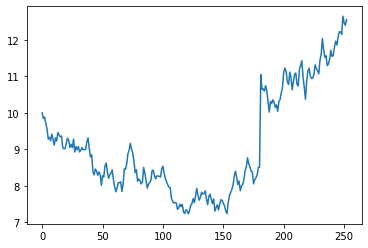

In [15]:
import matplotlib.pyplot as plt

y = list(simulated_paths)


plt.plot(simulated_paths[0])




